In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import string 

In [4]:
import nltk

In [5]:
from nltk.corpus import stopwords 

In [6]:
from nltk.tokenize import word_tokenize

In [7]:
from nltk.stem import WordNetLemmatizer

In [8]:
from nltk.classify import DecisionTreeClassifier

In [9]:
from nltk import metrics

In [10]:
from nltk.metrics.scores import (accuracy, precision, recall, f_measure) 

In [11]:
from nltk.classify import MaxentClassifier

In [12]:
from nltk.classify import SklearnClassifier

In [13]:
from sklearn.svm import SVC

In [14]:
from nltk import bigrams, trigrams

In [15]:
from nltk.collocations import BigramCollocationFinder

In [16]:
from nltk.metrics import BigramAssocMeasures

In [17]:
from nltk.collocations import TrigramCollocationFinder

In [18]:
from nltk.metrics import TrigramAssocMeasures

In [19]:
from nltk.corpus import stopwords

In [20]:
import seaborn as sns

In [21]:
import matplotlib.pyplot as plt

In [22]:
import collections

In [23]:
import random

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
from nltk.metrics import ConfusionMatrix

In [26]:
df1 = pd.read_csv("CyberBullyingDataset.csv")

In [27]:
df1.head()

,Tweet,Text Label
0,.omg why are poc wearing fugly blue contacts s...,Non-Bullying
1,.Sorry but most of the runners popular right n...,Non-Bullying
2,".those jeans are hideous, and I?m afraid he?s ...",Non-Bullying
3,.I had to dress up for a presentation in class...,Non-Bullying
4,.Am I the only one who thinks justin bieber is...,Non-Bullying


In [28]:
df1.tail()

,Tweet,Text Label
1060,"No we are not, But you are a race baiting libt...",Bullying
1061,"you wont get anyone for this challenge., after...",Bullying
1062,"I will follow you if you are not a libtard,Mus...",Bullying
1063,"michaelianblack Ur a child, an ostrich w/ your...",Bullying
1064,FoxNews. not to all the ppl I know that live t...,Bullying


In [29]:
df1.sample(10)

,Tweet,Text Label
419,If you?re a snitch kys.,Non-Bullying
532,.probably not gonna get my food anytime soon b...,Non-Bullying
477,"I hope I'm wrong."", 'When you complain about p...",Non-Bullying
304,If i was then you would be the teacher of the...,Non-Bullying
840,Kys x.,Bullying
262,"Lecture April 11, 5:30pm Joseph Winters ""Betwe...",Non-Bullying
75,.GUESS WHICH DUMBASS IS OFFICIALLY OUT OF ENGI...,Non-Bullying
910,.realDonaldTrump I call Bullshit #presidentshi...,Bullying
291,"BlueManc71 You said Hanzo, it's Genji!"", ""I'm ...",Non-Bullying
346,"I know who lol he also is Kilgrave.', 'And the...",Non-Bullying


In [30]:
Tweet = []
Labels = []

In [31]:
for row in df1["Tweet"]:
    words = word_tokenize(row)
    clean_words = [word.lower() for word in words if word not in set(string.punctuation)]
    english_stops = set(stopwords.words('english'))
    characters_to_remove = ["''",'``',"rt","https","’","“","”","\u200b","--","n't","'s","...","//t.c" ]
    clean_words = [word for word in clean_words if word not in english_stops]
    clean_words = [word for word in clean_words if word not in set(characters_to_remove)]
    #Lematise words
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma_list = [wordnet_lemmatizer.lemmatize(word) for word in clean_words]
    Tweet.append(lemma_list)

    for row in df1["Text Label"]:
        Labels.append(row)


In [32]:
combined = zip(Tweet, Labels)

In [33]:
def bag_of_words(words):
    return dict([(word, True) for word in words])

In [34]:
Final_Data = []

In [35]:
for r, v in combined:
    bag_of_words(r)
    Final_Data.append((bag_of_words(r),v))

In [36]:
random.shuffle(Final_Data)
print(len(Final_Data))

1065


In [37]:
train_set, test_set = Final_Data[0:746], Final_Data[746:]

In [38]:
refsets = collections. defaultdict(set)

In [39]:
testsets = collections.defaultdict(set)

In [40]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [41]:
wlabels = []
wtests = []

In [42]:
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)
    wlabels.append(label)
    wtests.append(observed)

In [43]:
refsets

defaultdict(set,
            {'Bullying': {0,
              3,
              4,
              7,
              8,
              11,
              12,
              13,
              15,
              16,
              20,
              21,
              23,
              25,
              29,
              30,
              31,
              32,
              34,
              36,
              37,
              39,
              43,
              45,
              46,
              50,
              53,
              55,
              57,
              60,
              61,
              62,
              65,
              66,
              68,
              70,
              76,
              78,
              79,
              81,
              84,
              86,
              88,
              92,
              93,
              97,
              104,
              105,
              106,
              107,
              116,
              117,
              118,
              1

In [44]:
testsets

defaultdict(set,
            {'Non-Bullying': {0,
              1,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              14,
              17,
              20,
              22,
              24,
              26,
              27,
              29,
              31,
              33,
              35,
              38,
              39,
              41,
              42,
              44,
              48,
              51,
              52,
              53,
              54,
              56,
              58,
              61,
              62,
              66,
              67,
              68,
              69,
              71,
              72,
              73,
              74,
              76,
              77,
              78,
              81,
              82,
              86,
              87,
              90,
              91,
              92,
              94,
              95,
   

In [45]:

cm = ConfusionMatrix(wlabels, wtests)
print(cm)

             |       N |
             |       o |
             |       n |
             |       - |
             |   B   B |
             |   u   u |
             |   l   l |
             |   l   l |
             |   y   y |
             |   i   i |
             |   n   n |
             |   g   g |
-------------+---------+
    Bullying | <88> 44 |
Non-Bullying |  62<125>|
-------------+---------+
(row = reference; col = test)



In [46]:
wlabels

['Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying

In [47]:
wtests

['Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Non-Bullying',
 'Non-Bullying',
 'Bullying',
 'Bullying',
 'Bullying',
 'Non-

In [48]:
print("Naive Bayes Performance with Unigrams ") 

Naive Bayes Performance with Unigrams 


In [49]:
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Accuracy: 0.6677115987460815


In [50]:
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)

In [51]:
nbrefset = collections.defaultdict(set)

In [52]:
nbtestset = collections.defaultdict(set)

In [53]:
for i, (feats, label) in enumerate(test_set):
    nbrefset[label].add(i)
    observed = nb_classifier.classify(feats)
    nbtestset[observed].add(i)

In [54]:
print("Unigram Naive Bayes Classifier Recall")
print('Bullying recall:', recall(nbtestset['Bullying'], nbrefset['Bullying']))

Unigram Naive Bayes Classifier Recall
Bullying recall: 0.5866666666666667


In [55]:
classifier.show_most_informative_features(n=10)

Most Informative Features
                     low = True           Bullyi : Non-Bu =     13.7 : 1.0
               worthless = True           Bullyi : Non-Bu =      8.2 : 1.0
                 someone = True           Non-Bu : Bullyi =      8.1 : 1.0
                      iq = True           Bullyi : Non-Bu =      6.9 : 1.0
                   sorry = True           Bullyi : Non-Bu =      6.6 : 1.0
                     kid = True           Bullyi : Non-Bu =      6.6 : 1.0
                    live = True           Bullyi : Non-Bu =      5.6 : 1.0
                      ur = True           Bullyi : Non-Bu =      5.6 : 1.0
                  retard = True           Bullyi : Non-Bu =      5.1 : 1.0
                everyone = True           Non-Bu : Bullyi =      5.0 : 1.0


In [56]:
dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)

In [57]:
refset = collections.defaultdict(set)

In [58]:
testset = collections.defaultdict(set)

In [59]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)

In [60]:
print("Unigram Decision Tree Classifier Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))

Unigram Decision Tree Classifier Recall
Bullying recall: 0.7192982456140351


In [61]:
logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

In [62]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)

In [63]:
print("Unigram Maxent Classifier Classifier Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))

Unigram Maxent Classifier Classifier Recall
Bullying recall: 0.6666666666666666


In [64]:
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

In [65]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)

In [66]:
print("SVM Classifier Classifier Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))

SVM Classifier Classifier Recall
Bullying recall: 0.6434108527131783


In [67]:
combined = zip(Tweet,Labels)

In [68]:
def bag_of_bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)  
    bigrams = bigram_finder.nbest(score_fn, n)  
    return bag_of_words(bigrams)

In [69]:
Final_Data2 =[]

In [70]:
for z, e in combined:
    bag_of_bigrams_words(z)
    Final_Data2.append((bag_of_bigrams_words(z),e))

In [71]:
random.shuffle(Final_Data2)
print(len(Final_Data2))

1065


In [72]:
train_set, test_set = Final_Data2[0:747], Final_Data2[747:]

In [73]:
refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

In [74]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [75]:
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

In [76]:
print("Naive Bayes Performance with Bigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Bigrams 
Accuracy: 0.6509433962264151


In [77]:
classifier.show_most_informative_features(n=10)

Most Informative Features
           ('low', 'iq') = True           Bullyi : Non-Bu =     14.9 : 1.0
       ('piece', 'shit') = True           Bullyi : Non-Bu =      8.4 : 1.0
  ('worthless', 'piece') = True           Bullyi : Non-Bu =      5.3 : 1.0
   ('pathetic', 'loser') = True           Bullyi : Non-Bu =      4.7 : 1.0
     ('fucking', 'cunt') = True           Bullyi : Non-Bu =      3.6 : 1.0
           ('gon', 'na') = True           Bullyi : Non-Bu =      3.6 : 1.0
('theellenshow', '.kamalaharris') = True           Bullyi : Non-Bu =      2.6 : 1.0
   ('fucking', 'retard') = True           Bullyi : Non-Bu =      2.6 : 1.0
        ('look', 'like') = True           Bullyi : Non-Bu =      2.0 : 1.0
      ('nobody', 'care') = True           Bullyi : Non-Bu =      1.9 : 1.0


In [78]:
dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)

In [79]:
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)

In [80]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)

In [81]:
print("Decision Tree Performance with Bigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Decision Tree Performance with Bigrams 
Accuracy: 0.6509433962264151


In [82]:
logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

In [83]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)

In [84]:
print("Maxent Performance with Bigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Maxent Performance with Bigrams 
Accuracy: 0.6509433962264151


In [85]:
print("Bigrams Maxent Recall")
print('Bullying recall:', recall(testset['Bullying'], refset['Bullying']))

Bigrams Maxent Recall
Bullying recall: 0.7


In [86]:
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

In [87]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)

In [88]:
print("SVM Performance with Bigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

SVM Performance with Bigrams 
Accuracy: 0.6509433962264151


In [89]:
combined = zip(Tweet,Labels)

In [90]:
def bag_of_trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq, n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)  
    trigrams = trigram_finder.nbest(score_fn, n)  
    return bag_of_words(trigrams)

In [91]:
Final_Data3 =[]

In [92]:
for z, e in combined:
    bag_of_trigrams_words(z)
    Final_Data3.append((bag_of_trigrams_words(z),e))

In [93]:
random.shuffle(Final_Data3)
print(len(Final_Data3))

1065


In [94]:
train_set, test_set = Final_Data3[0:747], Final_Data3[747:]

In [95]:
refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

In [96]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [97]:
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

In [98]:
print("Naive Bayes Performance with Trigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Trigrams 
Accuracy: 0.6477987421383647


In [99]:
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))

bullying precision: 0.8333333333333334
bullying recall: 0.04310344827586207


In [100]:
classifier.show_most_informative_features(n=10)

Most Informative Features
('worthless', 'piece', 'shit') = True           Bullyi : Non-Bu =      6.4 : 1.0
('look', 'european', 'country') = True           Bullyi : Non-Bu =      1.4 : 1.0
('another', 'low', 'iq') = True           Bullyi : Non-Bu =      1.4 : 1.0
('think', 'illegals', 'threat') = True           Bullyi : Non-Bu =      1.4 : 1.0
('threat', 'idiot', "'one") = True           Bullyi : Non-Bu =      1.4 : 1.0
('need', 'look', 'european') = True           Bullyi : Non-Bu =      1.4 : 1.0
('bitch', 'fugly', 'smoking') = True           Bullyi : Non-Bu =      1.4 : 1.0
('illegals', 'threat', 'idiot') = True           Bullyi : Non-Bu =      1.4 : 1.0
("'one", 'need', 'look') = True           Bullyi : Non-Bu =      1.4 : 1.0
('dope', 'like', 'junky') = True           Bullyi : Non-Bu =      1.4 : 1.0


In [101]:
dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)

In [102]:
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)

In [103]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)

In [104]:
print("Decision Tree Performance with Trigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Decision Tree Performance with Trigrams 
Accuracy: 0.6477987421383647


In [105]:
logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

In [106]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)

In [107]:
print("Maxent Performance with Trigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Maxent Performance with Trigrams 
Accuracy: 0.6477987421383647


In [108]:
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

In [109]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)

In [110]:
print("SVM Performance with Trigrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

SVM Performance with Trigrams 
Accuracy: 0.6477987421383647


In [111]:
combined = zip(Tweet,Labels)

In [112]:
def bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bigrams

In [113]:
def trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq, n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn, n)
    return trigrams

In [114]:
def bag_of_Ngrams_words(words):
    bigramBag = bigrams_words(words)
    
    for b in range(0,len(bigramBag)):
        bigramBag[b]=' '.join(bigramBag[b])
   
    trigramBag = trigrams_words(words)
    for t in range(0,len(trigramBag)):
        trigramBag[t]=' '.join(trigramBag[t])

    return bag_of_words(trigramBag + bigramBag + words)

In [115]:
Final_Data4 =[]

In [116]:
for z, e in combined:
    bag_of_Ngrams_words(z)
    Final_Data4.append((bag_of_Ngrams_words(z),e))

In [117]:
random.shuffle(Final_Data4)
print(len(Final_Data4))

1065


In [118]:
train_set, test_set = Final_Data4[0:747], Final_Data4[747:]

In [119]:
refsets = collections. defaultdict(set)
testsets = collections.defaultdict(set)

In [120]:
for i, (feats, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = classifier.classify(feats)
    testsets[observed].add(i)

In [121]:
print("Naive Bayes Performance with Ngrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Naive Bayes Performance with Ngrams 
Accuracy: 0.6037735849056604


In [122]:
classifier.show_most_informative_features(n=10)

Most Informative Features
('worthless', 'piece', 'shit') = True           Bullyi : Non-Bu =      6.4 : 1.0
('look', 'european', 'country') = True           Bullyi : Non-Bu =      1.4 : 1.0
('another', 'low', 'iq') = True           Bullyi : Non-Bu =      1.4 : 1.0
('think', 'illegals', 'threat') = True           Bullyi : Non-Bu =      1.4 : 1.0
('threat', 'idiot', "'one") = True           Bullyi : Non-Bu =      1.4 : 1.0
('need', 'look', 'european') = True           Bullyi : Non-Bu =      1.4 : 1.0
('bitch', 'fugly', 'smoking') = True           Bullyi : Non-Bu =      1.4 : 1.0
('illegals', 'threat', 'idiot') = True           Bullyi : Non-Bu =      1.4 : 1.0
("'one", 'need', 'look') = True           Bullyi : Non-Bu =      1.4 : 1.0
('dope', 'like', 'junky') = True           Bullyi : Non-Bu =      1.4 : 1.0


In [123]:
train_set

[({'low iq man': True,
   'president really low': True,
   'really low iq': True,
   'iq man': True,
   'low iq': True,
   'president really': True,
   'really low': True,
   'president': True,
   'really': True,
   'low': True,
   'iq': True,
   'man': True},
  'Bullying'),
 ({'anthro soon removed': True,
   'cause care money': True,
   'oder since putting': True,
   'putting anthro soon': True,
   'removed tix cause': True,
   'since putting anthro': True,
   'soon removed tix': True,
   'support oder since': True,
   'tix cause care': True,
   'wonder support oder': True,
   'care money ky': True,
   'ky wonder support': True,
   'anthro soon': True,
   'care money': True,
   'cause care': True,
   'oder since': True,
   'putting anthro': True,
   'removed tix': True,
   'since putting': True,
   'soon removed': True,
   'support oder': True,
   'tix cause': True,
   'wonder support': True,
   'ky wonder': True,
   'money ky': True,
   'ky': True,
   'wonder': True,
   'support': Tr

In [124]:
dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)

In [125]:
refset = collections.defaultdict(set)
testset = collections.defaultdict(set)

In [126]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = dt_classifier.classify(feats)
    testset[observed].add(i)

In [127]:
print("Decision Tree Performance with Ngrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Decision Tree Performance with Ngrams 
Accuracy: 0.6037735849056604


In [128]:
logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

In [129]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = logit_classifier.classify(feats)
    testset[observed].add(i)

In [130]:
print("Maxent Performance with Ngrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

Maxent Performance with Ngrams 
Accuracy: 0.6037735849056604


In [131]:
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

In [132]:
for i, (feats, label) in enumerate(test_set):
    refset[label].add(i)
    observed = SVM_classifier.classify(feats)
    testset[observed].add(i)

In [133]:
print("SVM Performance with Ngrams ")    
print("Accuracy:",nltk.classify.accuracy(classifier, test_set))

SVM Performance with Ngrams 
Accuracy: 0.6037735849056604


In [134]:
train_set, test_set = Final_Data[0:747], Final_Data[747:]

In [135]:
test_set

[({"'m": True, 'fed': True, 'migraine': True}, 'Non-Bullying'),
 ({'.sorry': True,
   'runner': True,
   'popular': True,
   'right': True,
   'plain': True,
   'fugly': True},
  'Non-Bullying'),
 ({'lol': True,
   'low': True,
   'iq': True,
   'moron': True,
   'running': True,
   'mouth': True,
   "'probably": True,
   'comment': True,
   'demonstrates': True,
   'wishful': True,
   'thinking': True,
   'butt': True},
  'Bullying'),
 ({'stage': True,
   'realising': True,
   'accepting': True,
   'white': True,
   'inferior': True,
   'fag': True,
   'mistress': True,
   'invite': True,
   'sir': True,
   'mate': True,
   'yo': True},
  'Bullying'),
 ({'ai': True,
   'bro': True,
   'swear': True,
   '.g00dgirlsteph': True,
   'got': True,
   'ta': True,
   'watch': True,
   "'she": True,
   'found': True,
   'grandpa': True,
   'f': True},
  'Non-Bullying'),
 ({'.record': True, 'beat': True, 'nigger': True}, 'Non-Bullying'),
 ({'ooh': True, 'please': True, 'totally': True, 'fine': 

In [136]:
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)

In [137]:
from nltk.classify.util import accuracy

In [138]:
print(accuracy(nb_classifier, test_set))

0.6698113207547169


In [139]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

In [140]:
wlabels = []
wtests = []
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = nb_classifier.classify(Final_Data)
    testsets[observed].add(i)
    wlabels.append(label)
    wtests.append(observed)

In [141]:
cm = ConfusionMatrix(wlabels, wtests)
print(cm)

             |       N |
             |       o |
             |       n |
             |       - |
             |   B   B |
             |   u   u |
             |   l   l |
             |   l   l |
             |   y   y |
             |   i   i |
             |   n   n |
             |   g   g |
-------------+---------+
    Bullying | <88> 43 |
Non-Bullying |  62<125>|
-------------+---------+
(row = reference; col = test)



In [142]:
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('bullying F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('not-bullying precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('not-bullying recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('not-bullying F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

bullying precision: 0.5866666666666667
bullying recall: 0.6717557251908397
bullying F-measure: 0.6263345195729537
not-bullying precision: 0.7440476190476191
not-bullying recall: 0.6684491978609626
not-bullying F-measure: 0.7042253521126761


In [143]:
dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)

In [144]:
print(accuracy(dt_classifier, test_set))

0.6415094339622641


In [145]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

In [146]:
wlabels = []
wtests = []
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = dt_classifier.classify(Final_Data)
    testsets[observed].add(i)
    wlabels.append(label)
    wtests.append(observed)

In [147]:
cm = ConfusionMatrix(wlabels, wtests)
print(cm)

             |       N |
             |       o |
             |       n |
             |       - |
             |   B   B |
             |   u   u |
             |   l   l |
             |   l   l |
             |   y   y |
             |   i   i |
             |   n   n |
             |   g   g |
-------------+---------+
    Bullying | <41> 90 |
Non-Bullying |  24<163>|
-------------+---------+
(row = reference; col = test)



In [148]:
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('bullying F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('non-bullying precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('non-bullying recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('non-bullying F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

bullying precision: 0.6307692307692307
bullying recall: 0.31297709923664124
bullying F-measure: 0.41836734693877553
non-bullying precision: 0.6442687747035574
non-bullying recall: 0.8716577540106952
non-bullying F-measure: 0.740909090909091


In [149]:
logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

In [150]:
wlabels = []
wtests = []
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = logit_classifier.classify(Final_Data)
    testsets[observed].add(i)
    wlabels.append(label)
    wtests.append(observed)

In [151]:
cm = ConfusionMatrix(wlabels, wtests)
print(cm)

             |       N |
             |       o |
             |       n |
             |       - |
             |   B   B |
             |   u   u |
             |   l   l |
             |   l   l |
             |   y   y |
             |   i   i |
             |   n   n |
             |   g   g |
-------------+---------+
    Bullying | <64> 67 |
Non-Bullying |  32<155>|
-------------+---------+
(row = reference; col = test)



In [152]:
print('Bullying  precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('Bullying  recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('Bullying  F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('Non-Bullying precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('Non-Bullying recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('Non-Bullying F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

Bullying  precision: 0.6302521008403361
Bullying  recall: 0.5725190839694656
Bullying  F-measure: 0.6
Non-Bullying precision: 0.6340579710144928
Non-Bullying recall: 0.9358288770053476
Non-Bullying F-measure: 0.7559395248380131


In [153]:
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

In [154]:
wlabels = []
wtests = []
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = SVM_classifier.classify(Final_Data)
    testsets[observed].add(i)
    wlabels.append(label)
    wtests.append(observed)

In [155]:
cm = ConfusionMatrix(wlabels, wtests)
print(cm)

             |       N |
             |       o |
             |       n |
             |       - |
             |   B   B |
             |   u   u |
             |   l   l |
             |   l   l |
             |   y   y |
             |   i   i |
             |   n   n |
             |   g   g |
-------------+---------+
    Bullying | <72> 59 |
Non-Bullying |  37<150>|
-------------+---------+
(row = reference; col = test)



In [156]:
print('Bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('Bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('Bullying F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('Non-Bullying precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('Non-Bullying recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('Non-Bullying F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

Bullying precision: 0.6044776119402985
Bullying recall: 0.6183206106870229
Bullying F-measure: 0.6113207547169811
Non-Bullying precision: 0.631768953068592
Non-Bullying recall: 0.9358288770053476
Non-Bullying F-measure: 0.7543103448275863


In [157]:
zl = zip(Tweet,Labels)

In [158]:
def bag_of_words(words):
    return dict([(word, True) for word in words])

In [159]:
def bag_of_words_not_in_set(words, badwords):
    return bag_of_words(set(words) - set(badwords))

In [160]:
def bag_of_non_stopwords(words, stopfile='english'):
    badwords = stopwords.words(stopfile)
    return bag_of_words_not_in_set(words, badwords)

In [161]:
def bag_of_bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bag_of_words(bigrams)
    
    bigrams = bag_of_bigrams_words(words)

In [162]:
Final_Data = []

In [163]:
for k, v in zl:
    bag_of_bigrams_words(k)
    Final_Data.append((bag_of_bigrams_words(k),v))

In [164]:
random.shuffle(Final_Data)

In [165]:
train_set, test_set = Final_Data[0:778], Final_Data[778:]

In [166]:
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)
nb_classifier.show_most_informative_features(10)

Most Informative Features
           ('low', 'iq') = True           Bullyi : Non-Bu =     10.0 : 1.0
       ('piece', 'shit') = True           Bullyi : Non-Bu =      8.9 : 1.0
  ('worthless', 'piece') = True           Bullyi : Non-Bu =      6.0 : 1.0
           ('gon', 'na') = True           Bullyi : Non-Bu =      3.3 : 1.0
   ('pathetic', 'loser') = True           Bullyi : Non-Bu =      2.6 : 1.0
('theellenshow', '.kamalaharris') = True           Bullyi : Non-Bu =      2.4 : 1.0
   ('fucking', 'retard') = True           Bullyi : Non-Bu =      2.4 : 1.0
       ('smell', 'like') = True           Bullyi : Non-Bu =      2.4 : 1.0
          ('dumb', 'as') = True           Bullyi : Non-Bu =      2.4 : 1.0
           ('i\\', "'m") = True           Non-Bu : Bullyi =      1.5 : 1.0


In [167]:
print(accuracy(nb_classifier, test_set))

0.627177700348432


In [168]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

In [169]:
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = nb_classifier.classify(Final_Data)
    testsets[observed].add(i)

In [170]:
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('bullying F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('not-bullying precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('not-bullying recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('not-bullying F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

bullying precision: 0.5
bullying recall: 0.2336448598130841
bullying F-measure: 0.3184713375796178
not-bullying precision: 0.6540084388185654
not-bullying recall: 0.8611111111111112
not-bullying F-measure: 0.7434052757793764


In [171]:
def bigrams_words(words, score_fn=BigramAssocMeasures.chi_sq, n=200):
    bigram_finder = BigramCollocationFinder.from_words(words)
    bigrams = bigram_finder.nbest(score_fn, n)
    return bigrams

In [172]:
def trigrams_words(words, score_fn=TrigramAssocMeasures.chi_sq, n=200):
    trigram_finder = TrigramCollocationFinder.from_words(words)
    trigrams = trigram_finder.nbest(score_fn, n)
    return trigrams

In [173]:
def bag_of_Ngrams_words(words):
    bigramBag = bigrams_words(words)
    
    #The following two for loops convert tuple into string
    for b in range(0,len(bigramBag)):
        bigramBag[b]=' '.join(bigramBag[b])
   
    trigramBag = trigrams_words(words)
    for t in range(0,len(trigramBag)):
        trigramBag[t]=' '.join(trigramBag[t])

    return bag_of_words(trigramBag + bigramBag + words)

In [174]:
zl = zip(Tweet,Labels)

In [175]:
Final_Data = []

In [176]:
for k, v in zl:
    bag_of_words(k)
    Final_Data.append((bag_of_words(k),v))

In [177]:
random.shuffle(Final_Data)

In [178]:
train_set, test_set = Final_Data[0:778], Final_Data[778:]

In [179]:
nb_classifier = nltk.NaiveBayesClassifier.train(train_set)
nb_classifier.show_most_informative_features(10)

Most Informative Features
                   mouth = True           Bullyi : Non-Bu =      7.4 : 1.0
                     amp = True           Non-Bu : Bullyi =      7.0 : 1.0
                     low = True           Bullyi : Non-Bu =      6.9 : 1.0
                   piece = True           Bullyi : Non-Bu =      6.6 : 1.0
            goatfucker.. = True           Bullyi : Non-Bu =      6.4 : 1.0
               worthless = True           Bullyi : Non-Bu =      6.2 : 1.0
                   sorry = True           Bullyi : Non-Bu =      5.4 : 1.0
                 libtard = True           Bullyi : Non-Bu =      5.3 : 1.0
                feminism = True           Non-Bu : Bullyi =      5.0 : 1.0
                    cunt = True           Bullyi : Non-Bu =      4.8 : 1.0


In [180]:
print(accuracy(nb_classifier, test_set))

0.6759581881533101


In [181]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

In [182]:
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = nb_classifier.classify(Final_Data)
    testsets[observed].add(i)

In [183]:
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('bullying F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('not-bullying precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('not-bullying recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('not-bullying F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

bullying precision: 0.5853658536585366
bullying recall: 0.631578947368421
bullying F-measure: 0.6075949367088607
not-bullying precision: 0.7439024390243902
not-bullying recall: 0.7052023121387283
not-bullying F-measure: 0.7240356083086052


In [184]:
dt_classifier = DecisionTreeClassifier.train(train_set, 
                                             binary=True, 
                                             entropy_cutoff=0.8, 
                                             depth_cutoff=5, 
                                             support_cutoff=30)

In [185]:
print(accuracy(dt_classifier, test_set))

0.6689895470383276


In [186]:
refsets = collections.defaultdict(set)
testsets = collections.defaultdict(set)

In [187]:
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = dt_classifier.classify(Final_Data)
    testsets[observed].add(i)

In [188]:
print('bullying precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('bullying recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('bullying F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('non-bullying precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('non-bullying recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('non-bullying F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

bullying precision: 0.7021276595744681
bullying recall: 0.2894736842105263
bullying F-measure: 0.40993788819875776
non-bullying precision: 0.6625
non-bullying recall: 0.9190751445086706
non-bullying F-measure: 0.7699757869249394


In [189]:
logit_classifier = MaxentClassifier.train(train_set, algorithm='gis', trace=0, max_iter=10, min_lldelta=0.5)

In [190]:
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = logit_classifier.classify(Final_Data)
    testsets[observed].add(i)

In [191]:
print('pos precision:', precision(refsets['Bullying'], testsets['Non-Bullying']))
print('pos recall:', recall(refsets['Bullying'], testsets['Non-Bullying']))
print('pos F-measure:', f_measure(refsets['Bullying'], testsets['Non-Bullying']))
print('neg precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('neg recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('neg F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

pos precision: 0.3412698412698413
pos recall: 0.7543859649122807
pos F-measure: 0.46994535519125685
neg precision: 0.6587301587301587
neg recall: 0.9595375722543352
neg F-measure: 0.7811764705882354


In [192]:
SVM_classifier = SklearnClassifier(SVC(), sparse=False).train(train_set)

In [193]:
for i, (Final_Data, label) in enumerate(test_set):
    refsets[label].add(i)
    observed = SVM_classifier.classify(Final_Data)
    testsets[observed].add(i)

In [194]:
print('pos precision:', precision(refsets['Bullying'], testsets['Bullying']))
print('pos recall:', recall(refsets['Bullying'], testsets['Bullying']))
print('pos F-measure:', f_measure(refsets['Bullying'], testsets['Bullying']))
print('neg precision:', precision(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('neg recall:', recall(refsets['Non-Bullying'], testsets['Non-Bullying']))
print('neg F-measure:', f_measure(refsets['Non-Bullying'], testsets['Non-Bullying']))

pos precision: 0.5692307692307692
pos recall: 0.6491228070175439
pos F-measure: 0.6065573770491803
neg precision: 0.6600790513833992
neg recall: 0.9653179190751445
neg F-measure: 0.7840375586854459


In [195]:
from sklearn.model_selection import train_test_split

In [196]:
from sklearn.preprocessing import LabelEncoder

In [197]:
from tensorflow.keras.models import Model

In [198]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

In [199]:
from tensorflow.keras.optimizers import RMSprop

In [200]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [201]:
from tensorflow.keras.preprocessing import sequence

In [202]:
from tensorflow.keras.utils import to_categorical

In [203]:
from tensorflow.keras.callbacks import EarlyStopping

In [204]:
df1 = pd.read_csv("CyberBullyingDataset.csv",delimiter=',',encoding='latin-1')

In [205]:
df1.head()

,Tweet,Text Label
0,.omg why are poc wearing fugly blue contacts s...,Non-Bullying
1,.Sorry but most of the runners popular right n...,Non-Bullying
2,".those jeans are hideous, and I?m afraid he?s ...",Non-Bullying
3,.I had to dress up for a presentation in class...,Non-Bullying
4,.Am I the only one who thinks justin bieber is...,Non-Bullying


Text(0.5, 1.0, 'Number of Bullying and Non-Bullying messages')

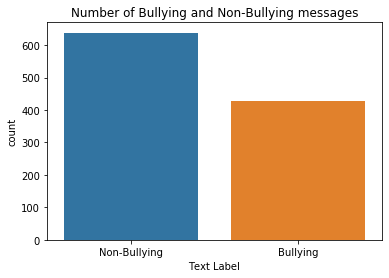

In [206]:
sns.countplot(df1["Text Label"])
plt.xlabel('Text Label')
plt.title('Number of Bullying and Non-Bullying messages')

In [207]:
X = df1["Tweet"]
Y = df1["Text Label"]
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [208]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [209]:
max_words = 10000
max_len = 1750
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [210]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [211]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 1750)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1750, 50)          500000    
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [212]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=20,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/20
6/6 [==============================] - 22s 4s/step - loss: 0.6886 - accuracy: 0.5773 - val_loss: 0.6768 - val_accuracy: 0.6077
Epoch 2/20
6/6 [==============================] - 23s 4s/step - loss: 0.6710 - accuracy: 0.5981 - val_loss: 0.6555 - val_accuracy: 0.6077
Epoch 3/20
6/6 [==============================] - 23s 4s/step - loss: 0.6073 - accuracy: 0.6506 - val_loss: 0.6147 - val_accuracy: 0.6243
Epoch 4/20
6/6 [==============================] - 23s 4s/step - loss: 1.5206 - accuracy: 0.7265 - val_loss: 0.5848 - val_accuracy: 0.7127
Epoch 5/20
6/6 [==============================] - 22s 4s/step - loss: 0.4107 - accuracy: 0.8577 - val_loss: 0.5697 - val_accuracy: 0.7072
Epoch 6/20
6/6 [==============================] - 22s 4s/step - loss: 0.3067 - accuracy: 0.9144 - val_loss: 0.6000 - val_accuracy: 0.6906


In [213]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [214]:
accr = model.evaluate(test_sequences_matrix,Y_test)

5/5 [==============================] - 1s 171ms/step - loss: 0.5442 - accuracy: 0.7250


In [215]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.544
  Accuracy: 0.725
